# Task 6.4. Supervised Machine Learning: Regression

### This script contains the following:
#### 1. Import data and libraries
#### 2. Data cleaning
#### 3. Data Preparation for Regression Analysis
#### 4. Hypothesis 
#### 5. Reshaping variables
#### 6. Splitting data
#### 7. Linear regression
#### 8. Plot on test
#### 9. Results Interpretation
#### 10. Model Performance Statistics
#### 11. Comparison of predicted and actual values
#### 12. Conclussions

## ---------------------------------------------------------------------------------------------------------------------

### 1. Importing data and libraries

In [1]:
# After installing scikit-learn through the command prompt, install libraries needed for analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Then we create a path 

path = r'C:\Users\javis\OneDrive\Documentos\Career Foundry\2. Data Immersion\6. Advanced Analytics\UK HPI Project'

In [3]:
# We import our data, which had already been cleaned

df = pd.read_csv(os.path.join(path,'2. Data', '2.2. Prepared Data', 'HPI wrangled.csv'), index_col = False)

In [4]:
# To have a look at how it looks like

df.head()

,Unnamed: 0,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,%Change_AvgPrice_1month,%Change_AvgPrice_12months,AveragePriceSA,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
0,0,01/01/2004,Aberdeenshire,S12000034,81693.66964,40.864214,NaN,NaN,NaN,NaN,...,88436.13953,40.267250,NaN,NaN,103.0,81043.95084,40.883367,NaN,NaN,285.0
1,1,01/02/2004,Aberdeenshire,S12000034,81678.76231,40.856757,NaN,-0.018248,NaN,NaN,...,88606.44649,40.344795,0.192576,NaN,107.0,80965.29542,40.843688,-0.097053,NaN,219.0
2,2,01/03/2004,Aberdeenshire,S12000034,83525.09702,41.780317,NaN,2.260483,NaN,NaN,...,90296.91375,41.114508,1.907838,NaN,140.0,82903.23948,41.821302,2.393549,NaN,313.0
3,3,01/04/2004,Aberdeenshire,S12000034,84333.67900,42.184780,NaN,0.968071,NaN,NaN,...,90319.87844,41.124964,0.025432,NaN,180.0,84003.99161,42.376586,1.327755,NaN,391.0
4,4,01/05/2004,Aberdeenshire,S12000034,86379.95396,43.208353,NaN,2.426403,NaN,NaN,...,91989.17763,41.885039,1.848208,NaN,167.0,86222.73484,43.495852,2.641235,NaN,335.0


In [5]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

### 2. Data cleaning and wrangling

#### 2.1. Missing values

In [6]:
# Check for missing values

df.isnull().sum()

Unnamed: 0                        0
Date                              0
RegionName                        0
AreaCode                          0
AveragePrice                      0
Index                             0
IndexSA                      130305
%Change_AvgPrice_1month         443
%Change_AvgPrice_12months      5040
AveragePriceSA               130305
SalesVolume                    4499
DetachedPrice                  6237
DetachedIndex                  6237
Detached1m%Change              6646
Detached12m%Change            11121
SemiDetachedPrice              6225
SemiDetachedIndex              6225
SemiDetached1m%Change          6634
SemiDetached12m%Change        11109
TerracedPrice                  6198
TerracedIndex                  6198
Terraced1m%Change              6607
Terraced12m%Change            11082
FlatPrice                      5901
FlatIndex                      5901
Flat1m%Change                  6311
Flat12m%Change                10797
CashPrice                   

There are many missing values but I won't fix that now as I won't be using all the variables in the set

#### 2.2. Subseting dataframe

In [38]:
# I will create a subset for those variables that I will use for our analysis. But I will define the columns first

columns = ["RegionName","AreaCode", "AveragePrice", "Index","%Change_AvgPrice_1month","%Change_AvgPrice_12months","SalesVolume","NewPrice","NewSalesVolume", "OldPrice", "OldSalesVolume"]

In [39]:
# To create the subset

uk_hpi = df[columns]

In [40]:
# To check the subset

uk_hpi.head()

,RegionName,AreaCode,AveragePrice,Index,%Change_AvgPrice_1month,%Change_AvgPrice_12months,SalesVolume,NewPrice,NewSalesVolume,OldPrice,OldSalesVolume
0,Aberdeenshire,S12000034,81693.66964,40.864214,NaN,NaN,388.0,88436.13953,103.0,81043.95084,285.0
1,Aberdeenshire,S12000034,81678.76231,40.856757,-0.018248,NaN,326.0,88606.44649,107.0,80965.29542,219.0
2,Aberdeenshire,S12000034,83525.09702,41.780317,2.260483,NaN,453.0,90296.91375,140.0,82903.23948,313.0
3,Aberdeenshire,S12000034,84333.67900,42.184780,0.968071,NaN,571.0,90319.87844,180.0,84003.99161,391.0
4,Aberdeenshire,S12000034,86379.95396,43.208353,2.426403,NaN,502.0,91989.17763,167.0,86222.73484,335.0


#### 2.3. Filling up missing values

In [43]:
# For those variables that we will use, I will impute missing values with median

uk_hpi['%Change_AvgPrice_1month'].fillna(uk_hpi['%Change_AvgPrice_1month'].median(), inplace=True)
uk_hpi['%Change_AvgPrice_12months'].fillna(uk_hpi['%Change_AvgPrice_12months'].median(), inplace=True)
uk_hpi['NewPrice'].fillna(uk_hpi['NewPrice'].median(), inplace=True)
uk_hpi['NewSalesVolume'].fillna(uk_hpi['NewSalesVolume'].median(), inplace=True)
uk_hpi['OldPrice'].fillna(uk_hpi['OldPrice'].median(), inplace=True)
uk_hpi['OldSalesVolume'].fillna(uk_hpi['OldSalesVolume'].median(), inplace=True)
uk_hpi['SalesVolume'].fillna(uk_hpi['SalesVolume'].median(), inplace=True)

In [44]:
# Last check for NaN

uk_hpi.isnull().sum()

RegionName                   0
AreaCode                     0
AveragePrice                 0
Index                        0
%Change_AvgPrice_1month      0
%Change_AvgPrice_12months    0
SalesVolume                  0
NewPrice                     0
NewSalesVolume               0
OldPrice                     0
OldSalesVolume               0
dtype: int64

#### 2.4. Duplicates

In [45]:
# To look out for duplicates

dups = uk_hpi.duplicated()

In [46]:
dups.shape # No dups

(134829,)

#### 2.5. Extreme values

<AxesSubplot:xlabel='AveragePrice', ylabel='Count'>

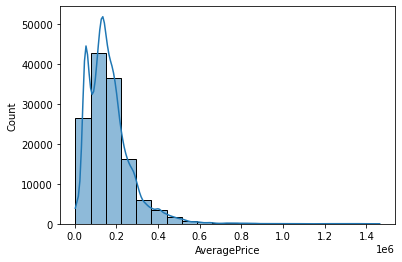

In [47]:
# To check if we have extreme values

sns.histplot(uk_hpi ['AveragePrice'], bins=20, kde = True) # shows extreme values for 'AveragePrice'

<AxesSubplot:xlabel='NewPrice', ylabel='Count'>

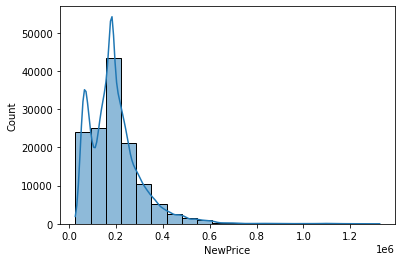

In [48]:
sns.histplot(uk_hpi ['NewPrice'], bins=20, kde = True) # shows extreme values for 'AveragePrice'

<AxesSubplot:xlabel='NewSalesVolume', ylabel='Count'>

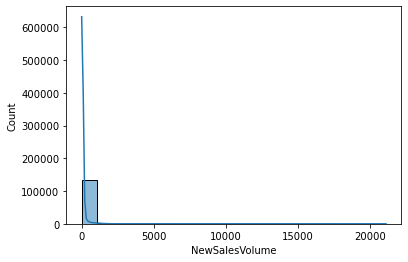

In [49]:
sns.histplot(uk_hpi ['NewSalesVolume'], bins=20, kde = True) # shows extreme values for 'AveragePrice'

In [67]:
# To check the mean

uk_hpi['NewPrice'].mean()

197496.78134553556

In [66]:
uk_hpi['NewSalesVolume'].mean()

122.65364276231375

In [65]:
uk_hpi['SalesVolume'].mean()

1182.2134926462409

### 3. Preparating data for Regression Analysis

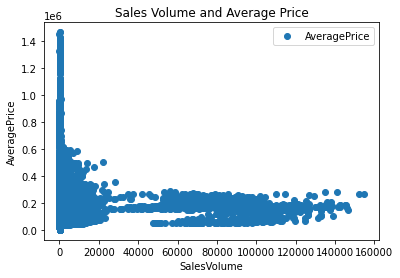

In [71]:
# Create a scatterplot using matplotlib to see how the chosen variables plot against each other.

uk_hpi.plot(x = 'SalesVolume', y='AveragePrice',style='o') 
plt.title('Sales Volume and Average Price')  
plt.xlabel('SalesVolume')  
plt.ylabel('AveragePrice')  
plt.show()

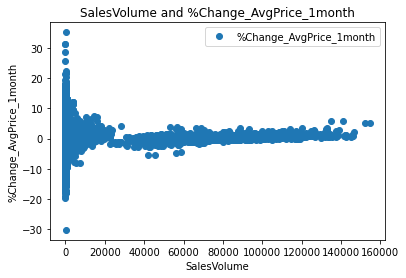

In [72]:
# I will do the same for another couple of variables relationships

uk_hpi.plot(x = 'SalesVolume', y='%Change_AvgPrice_1month',style='o') 
plt.title('SalesVolume and %Change_AvgPrice_1month')  
plt.xlabel('SalesVolume')  
plt.ylabel('%Change_AvgPrice_1month')  
plt.show()

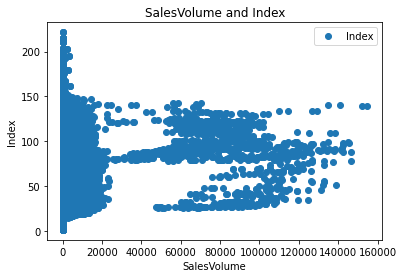

In [73]:
uk_hpi.plot(x = 'SalesVolume', y='Index',style='o') 
plt.title('SalesVolume and Index')  
plt.xlabel('SalesVolume')  
plt.ylabel('Index')  
plt.show()

Due to the weak insight that I can take from the last two scatterplots, I will do my linear regression analysis based on the relationship between Sales Volume and Average Price

### 4. Hypothesis

#### " The highest the Average Price is, the lowest the Sales Volume"

### 5. Reshaping variables into NumPy arrays

In [87]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = uk_hpi['AveragePrice'].values.reshape(-1,1)
y = uk_hpi['SalesVolume'].values.reshape(-1,1)

In [88]:
# To look how they look like

X

array([[ 81693.66964],
       [ 81678.76231],
       [ 83525.09702],
       ...,
       [189337.9622 ],
       [193306.5814 ],
       [196876.8213 ]])

In [89]:
y

array([[ 388.],
       [ 326.],
       [ 453.],
       ...,
       [2538.],
       [ 214.],
       [ 214.]])

### 6. Splitting data

In [90]:
# As a last preparation step, I will split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 7. Regression Analysis

#### 7.1. Fitting model to training set

In [91]:
# Firstly I will create a regression object

regression = LinearRegression()

In [92]:
# Then, I fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

#### 7.2. Predicting on the test set

In [93]:
# Let's predict the values of y using X.

y_predicted = regression.predict(X_test)

### 8. Plotting regression line on test set

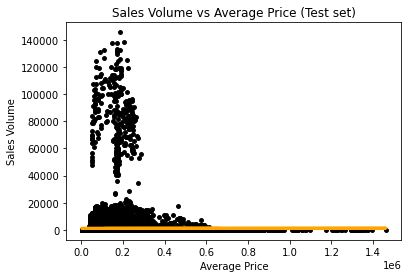

In [94]:
# Then create a plot showing the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='black', s = 15)
plot_test.plot(X_test, y_predicted, color='orange', linewidth =3)
plot_test.title('Sales Volume vs Average Price (Test set)')
plot_test.xlabel('Average Price')
plot_test.ylabel('Sales Volume')
plot_test.show()

### 9. Interpretation

As we can see, the line is completely horizontal, meaning that this model wouldn't be useful. There are still too many points out and far from the regression line, so a linear regression wouldn't be appropiated to predict the sales based on the average price. Also it cross my mind how the model would change if I remove those values from the Sales Volume that are equal to 0, but I would be removing something I am not 100 % sure it is not correct. It could be that certain areas in certain months didn't have any sales.

### 10. Checking model performance statistics

In [95]:
# Firstly let's create objects for each of the model summary statistics to analyse

# Mean squared error
rmse = mean_squared_error(y_test, y_predicted) 

# R2 score. 
r2 = r2_score(y_test, y_predicted) 

In [96]:
# Then, to see the results of those statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[8.46967403e-05]]
Mean squared error:  57243676.828183815
R2 score:  -2.0921444136012823e-05


As we saw visually, our model wouldn't be useful to predict the sales volume. The R2 score is very close to 0 and negative, meaning that the model fits worse than a horizontal line, its a very poor fit. The mean squared error is huge, which indicates that the regression line is very far from the data points, and that it is not accurate. 

### 11. Comparing predicted and actual values 

In [86]:
# Let's create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(40)

,Actual,Predicted
0,119223.01500,166362.638906
1,229167.67170,166338.540849
2,70286.90787,166359.723818
3,121851.17620,166337.005569
4,40328.08228,166345.090079
5,231973.17020,166336.189345
6,19990.86911,166339.668016
7,136981.88630,166339.687450
8,282088.23080,166341.591974
9,145709.40500,166431.260066


### 12. Conclussions

We can strongly conclude that this model is pure rubbish when trying to predict the sales volume based solely on the sale price. The actual values and the predicted values are not even close, horizontal regression lines mean that the result of the dependent variable doesn't change with movements on the independent variable. It seems clear that for a lower average price there are more sales, as there are many more points accumulated between 0.01 and 0.3 ( £10000 & £300000, respectively) than in the rest of the graph. A regression curve would much better predict the behaviour of the sales.

### Bonus: performance improvement after removing outliers

In [97]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

uk_hpi_test = uk_hpi[uk_hpi['SalesVolume'] > 0 ] 

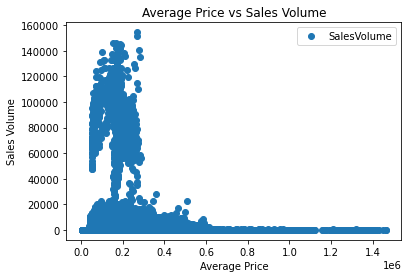

In [98]:
# See how the scatterplot looks without outliers.

uk_hpi_test.plot(x = 'AveragePrice', y='SalesVolume',style='o') 
plt.title('Average Price vs Sales Volume')  
plt.xlabel('Average Price')  
plt.ylabel('Sales Volume')  
plt.show()


I can see already that there is still many values  on the 0 or very close to it. Since I don't want to remove more data and this model can't really improve much, I won't continue with this last analysis. 